# 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(r'C:\Users\yesia\Downloads\archive\insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
### we have three catagorical columns which is sex, smoker and region ###

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\yesia\AppData\Local\Temp\ipykernel_3936\3231267464.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


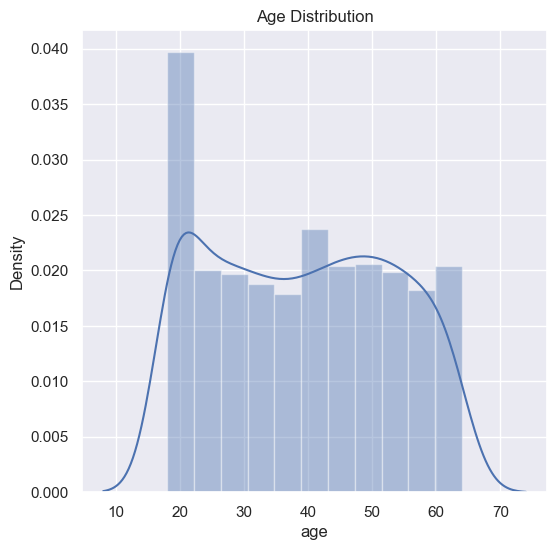

In [9]:
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

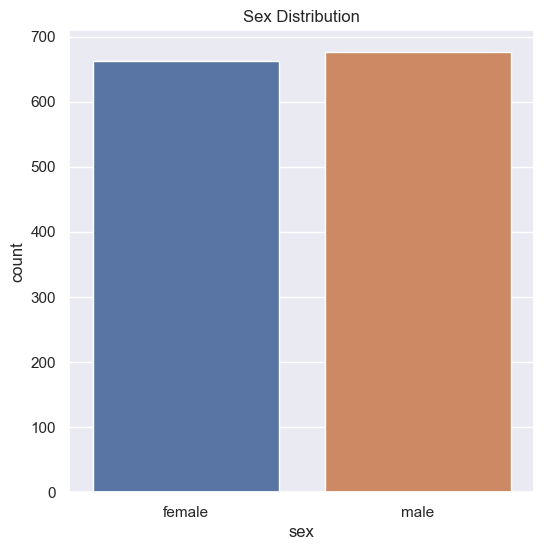

In [10]:
#  now we will check it for gender 

plt.figure(figsize =(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

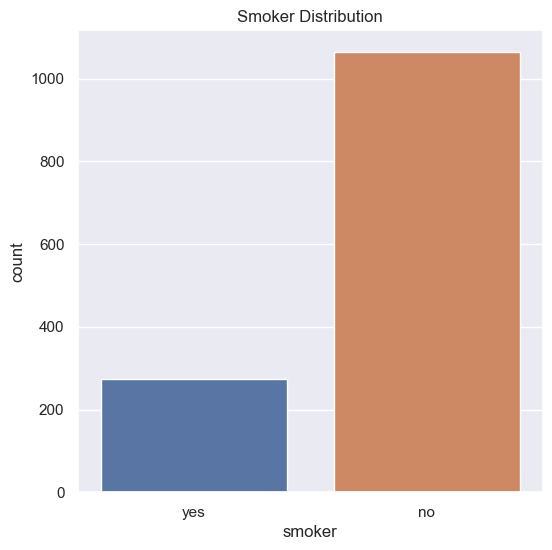

In [11]:
plt.figure(figsize =(6,6))
sns.countplot(x='smoker', data=df)
plt.title('Smoker Distribution')
plt.show()

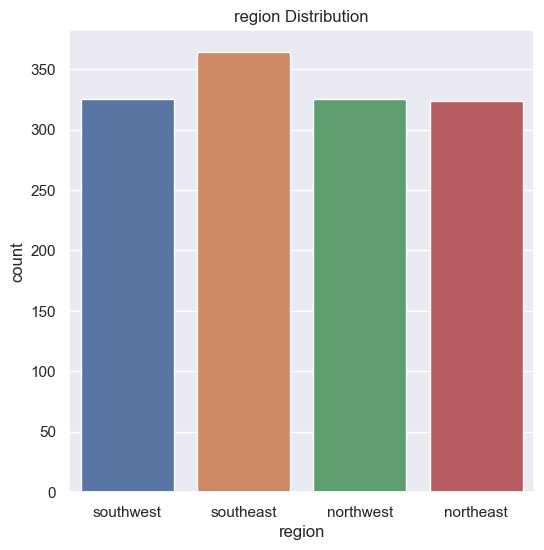

In [12]:
plt.figure(figsize =(6,6))
sns.countplot(x='region', data=df)
plt.title('region Distribution')
plt.show()

In [13]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\yesia\AppData\Local\Temp\ipykernel_3936\3692076889.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


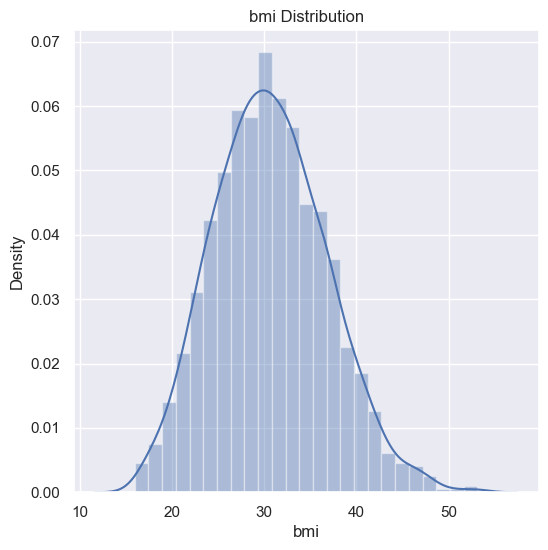

In [18]:
plt.figure(figsize =(6,6))
sns.distplot(df['bmi'])
plt.title('bmi Distribution')
plt.show()

# normal bmi = 18.5 to 24.9

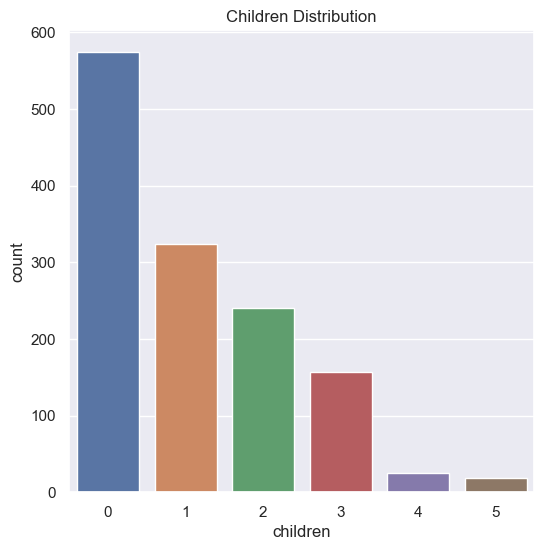

In [20]:
plt.figure(figsize =(6,6))
sns.countplot(x='children' ,data=df)
plt.title('Children Distribution')
plt.show()

In [21]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [22]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [23]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\yesia\AppData\Local\Temp\ipykernel_3936\1615469071.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


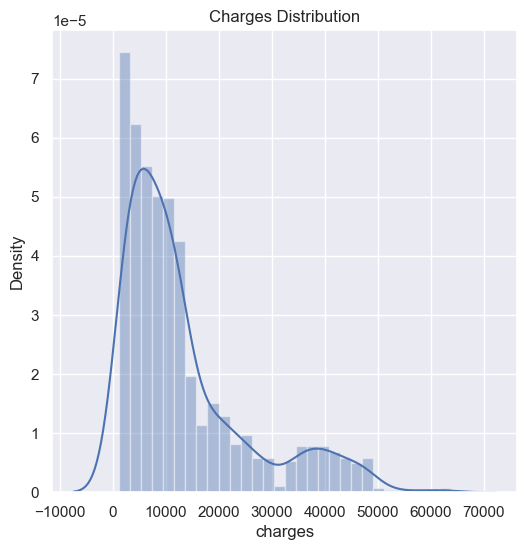

In [24]:
plt.figure(figsize =(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

In [29]:
#  data pre-processing
#  endoging the categorical features

df.replace({'sex':{'male':0,'female':1}}, inplace = True)

# encoding for smoker
df.replace({'smoker': {'yes':0, 'no':1}}, inplace = True)

#  encoding for region
df.replace({'region':{'southeast':0, 'southwest':1,'northeast':2, 'northwest':3}}, inplace = True)

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [31]:
#  splitting the data 

X = df.drop(columns = 'charges', axis = 1)
Y = df['charges']

In [32]:
# performing train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =2)

In [33]:
print(X.shape, X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [34]:
# model training

model = LinearRegression()

In [35]:
model.fit(X_train,Y_train)

LinearRegression()

In [36]:
# model Evalaution
#  data prediction

trainprediction = model.predict(X_train)

In [38]:
# rsquare value its between 0 to 1

r2_train = metrics.r2_score(Y_train, trainprediction)
print('r2value:', r2_train)

r2value: 0.751505643411174


In [42]:
#  r square for testing data
testprediction =model.predict(X_test)
r2_test = metrics.r2_score(Y_test, testprediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684077


In [47]:
#  building a predictive system

input_data=(31,1,25.74,0,1,0)

#  changing input data which is tuple to numpy array

array = np.asarray(input_data)

# reshaping the array

reshape = array.reshape(1,-1)
prediction = model.predict(reshape)
print(prediction)

print("The insurance cost is USD:", prediction[0])

[3760.0805765]
The insurance cost is USD: 3760.0805764960496


C:\Users\yesia\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
